## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata,study_results,how="left", on="Mouse ID")

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(f"The size of the data frame is {merge_data.shape}")
print(f"The number of mice in the data frame is {merge_data['Mouse ID'].nunique()}")

The size of the data frame is (1893, 8)
The number of mice in the data frame is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateID = merge_data[merge_data.duplicated(['Mouse ID', "Timepoint"])]
duplicateID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_value = merge_data.loc[merge_data['Mouse ID'] == 'g989']
print(duplicate_value.count())
print(duplicate_value)

Mouse ID              13
Drug Regimen          13
Sex                   13
Age_months            13
Weight (g)            13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
dtype: int64
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_df = merge_data[merge_data["Mouse ID"] != "g989"]
clean_merge_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_merge_df["Mouse ID"].count()

1880

In [7]:
clean_merge_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each re
stat_table = ['mean', 'median', 'var', 'std', 'sem']

summary_stat = clean_merge_df.groupby(['Drug Regimen'], as_index=False)[['Tumor Volume (mm3)']].agg(stat_table)
summary_stat
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

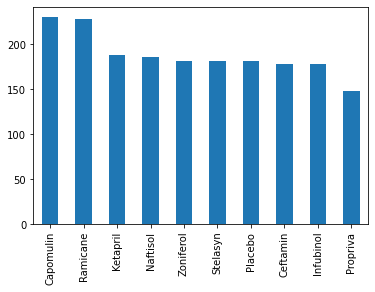

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_group = clean_merge_df['Drug Regimen'].value_counts()
drug_group.plot(kind="bar")
plt.show()

In [10]:
clean_merge_df['Drug Regimen'].unique()


array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

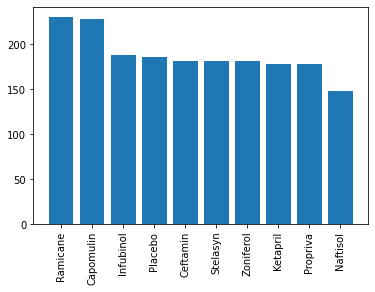

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Drug_Regimen = clean_merge_df['Drug Regimen'].unique()
Drug_Values = clean_merge_df['Drug Regimen'].value_counts()
#x_axis = np.arange(len(bars_in_cities))
plt.bar(Drug_Regimen, Drug_Values)
plt.xticks(rotation="vertical")
plt.show()

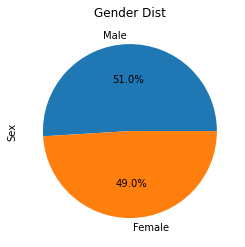

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_merge_df['Sex'].value_counts()
gender_group.plot(kind='pie', title='Gender Dist',autopct="%1.1f%%")
plt.show()


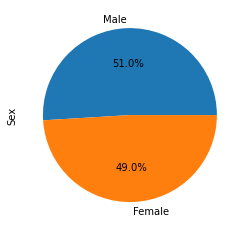

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex = clean_merge_df['Sex'].unique()
Male_Female = clean_merge_df['Sex'].value_counts()

plt.pie(Male_Female,labels=Sex, autopct="%1.1f%%")
# plt.xticks(rotation="vertical")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
drug_four = clean_merge_df.groupby(['Mouse ID'])['Timepoint'].max()
drug_four = pd.DataFrame(drug_four).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data2 = pd.merge(drug_four,clean_merge_df, how="left", on=["Mouse ID","Timepoint"])
merge_data2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_treatments

# # Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in four_treatments:
# Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merge_data2.loc[merge_data2["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
# add subset 
    tumor_vol.append(final_tumor_vol)
# Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

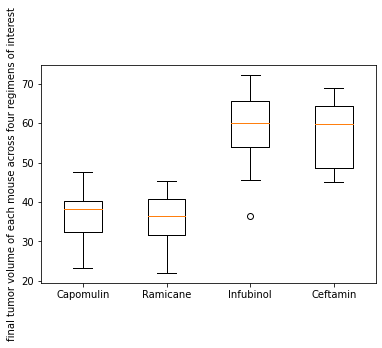

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels = four_treatments)
plt.ylabel("final tumor volume of each mouse across four regimens of interest")
plt.show


## Line and Scatter Plots

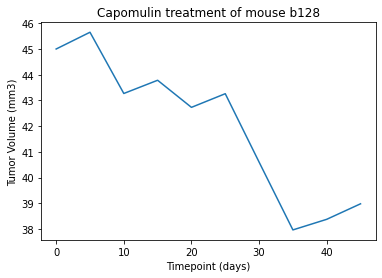

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin"]
Capomulin_Mouse = Capomulin.loc[Capomulin["Mouse ID"]== "b128"]
plt.plot(Capomulin_Mouse["Timepoint"],Capomulin_Mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")
plt.show()

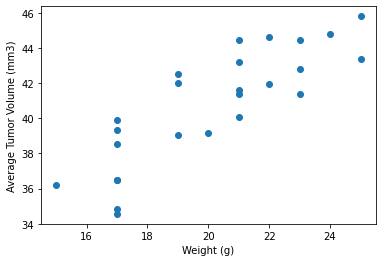

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin"]
Average_Capomulin =  Capomulin.groupby(["Mouse ID"]).mean()
plt.scatter(Average_Capomulin["Weight (g)"],Average_Capomulin["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


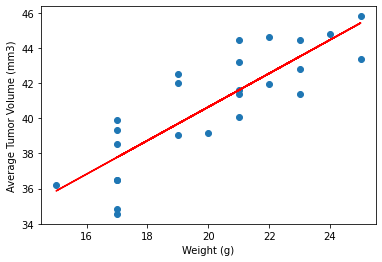

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation=round(st.pearsonr(Average_Capomulin["Weight (g)"],Average_Capomulin["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
model = st.linregress(Average_Capomulin["Weight (g)"],Average_Capomulin["Tumor Volume (mm3)"])
y_values = Average_Capomulin["Weight (g)"]*model[0]+model[1]
plt.scatter(Average_Capomulin["Weight (g)"],Average_Capomulin["Tumor Volume (mm3)"])
plt.plot(Average_Capomulin["Weight (g)"],y_values,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()